In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
from tqdm import tqdm_notebook as tqdm
import json
import pandas as pd
import pickle
import os
import h5py
import collections as cl
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
import random
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from deem import deem

In [2]:
param_grid = {'LR_param': {'C':[10**k for k in range(-8, 4, 1)]}, 'scoring': 'roc_auc', 'cv': 3, 'random_state': 42}

with open("openmic_classmap_10.json", "r") as f: # only consider 10 classes of Openmic dataset
    openmic_class_map = json.load(f)
    
# use a dict to align the classes between Openmic dataset (key) and Irmas dataset (val)
with open("class_align.json", "r") as f: 
    class_align = json.load(f)

with open("genre_map.json", "r") as f: 
    genre_map = json.load(f)

with open("instrument_map.json", "r") as f: 
    instrument_map = json.load(f)

## VGGish

In [3]:
embedding = 'vggish'
debias_method = '-k'

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid, class_align=class_align)

irmas_feature = deb.load_irmas()
openmic_feature = deb.load_openmic()

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Load IRMAS data:


100%|██████████| 6705/6705 [00:01<00:00, 4539.87it/s]


# Train: 4997,  # Test: 1666
Load OpenMIC data:


100%|██████████| 5085/5085 [00:00<00:00, 28843.26it/s]


# Train: 6838,  # Test: 2491
Train on irmas, test on irmas


100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:18<00:00,  1.86s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


In [4]:
debias_method = '-klda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Train on irmas, test on irmas


100%|██████████| 10/10 [00:25<00:00,  2.57s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:24<00:00,  2.48s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:26<00:00,  2.67s/it]


In [5]:
debias_method = '-mklda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

deb.result_all.to_csv('results/result_' + embedding + debias_method + '.csv', index=False)
result_all = deb.result_all

Train on irmas, test on irmas


100%|██████████| 10/10 [00:33<00:00,  3.35s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:36<00:00,  3.63s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:34<00:00,  3.41s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:35<00:00,  3.51s/it]


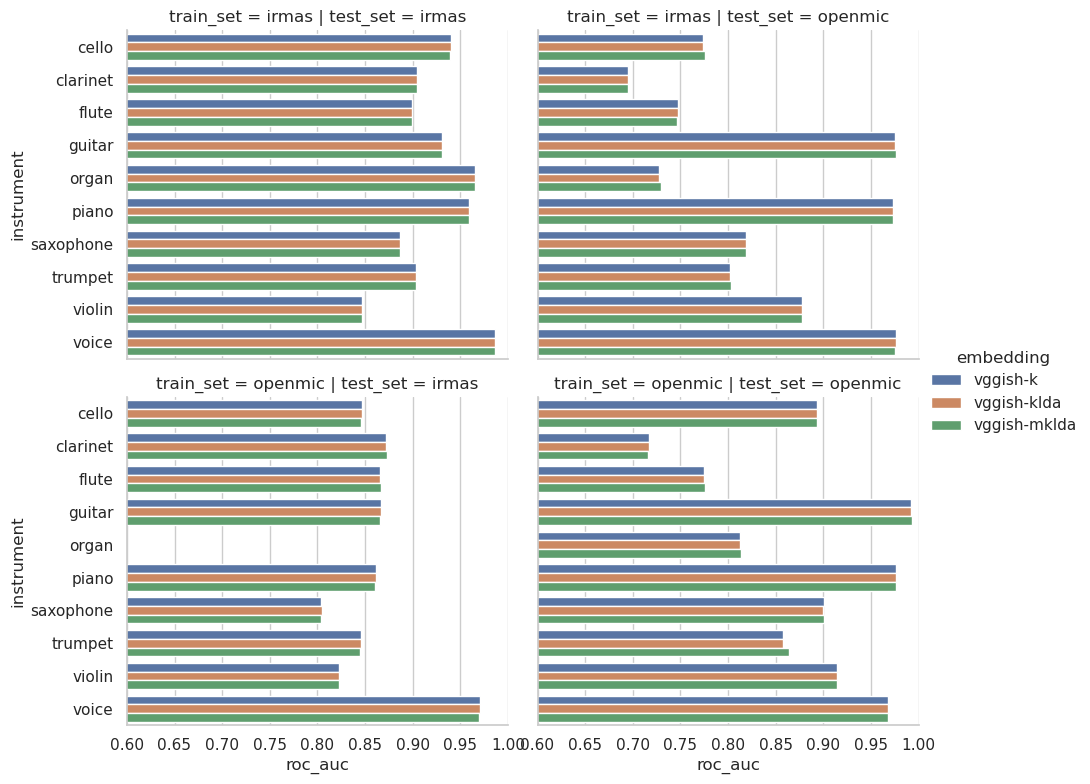

In [7]:
debias_method = '-mklda'
embedding = 'vggish'
df = pd.read_csv('results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

## OpenL3

In [7]:
embedding = 'openl3'
debias_method = '-k'

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid, class_align=class_align)

irmas_feature = deb.load_irmas()
openmic_feature = deb.load_openmic()

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Load IRMAS data:


100%|██████████| 6705/6705 [00:17<00:00, 389.51it/s]


# Train: 4997,  # Test: 1666
Load OpenMIC data:


100%|██████████| 5085/5085 [00:00<00:00, 32776.41it/s]


# Train: 6838,  # Test: 2491
Train on irmas, test on irmas


100%|██████████| 10/10 [01:10<00:00,  7.01s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [01:08<00:00,  6.89s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [01:15<00:00,  7.60s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [01:13<00:00,  7.35s/it]


In [8]:
debias_method = '-klda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Train on irmas, test on irmas


 60%|██████    | 6/10 [02:25<01:36, 24.20s/it]


KeyboardInterrupt: 

In [8]:
debias_method = '-mklda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

deb.result_all.to_csv('results/result_' + embedding + debias_method + '.csv', index=False)
result_all = result_all.append(deb.result_all)

Train on irmas, test on irmas


100%|██████████| 10/10 [07:55<00:00, 47.50s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [07:49<00:00, 46.97s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [07:51<00:00, 47.15s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [07:57<00:00, 47.77s/it]


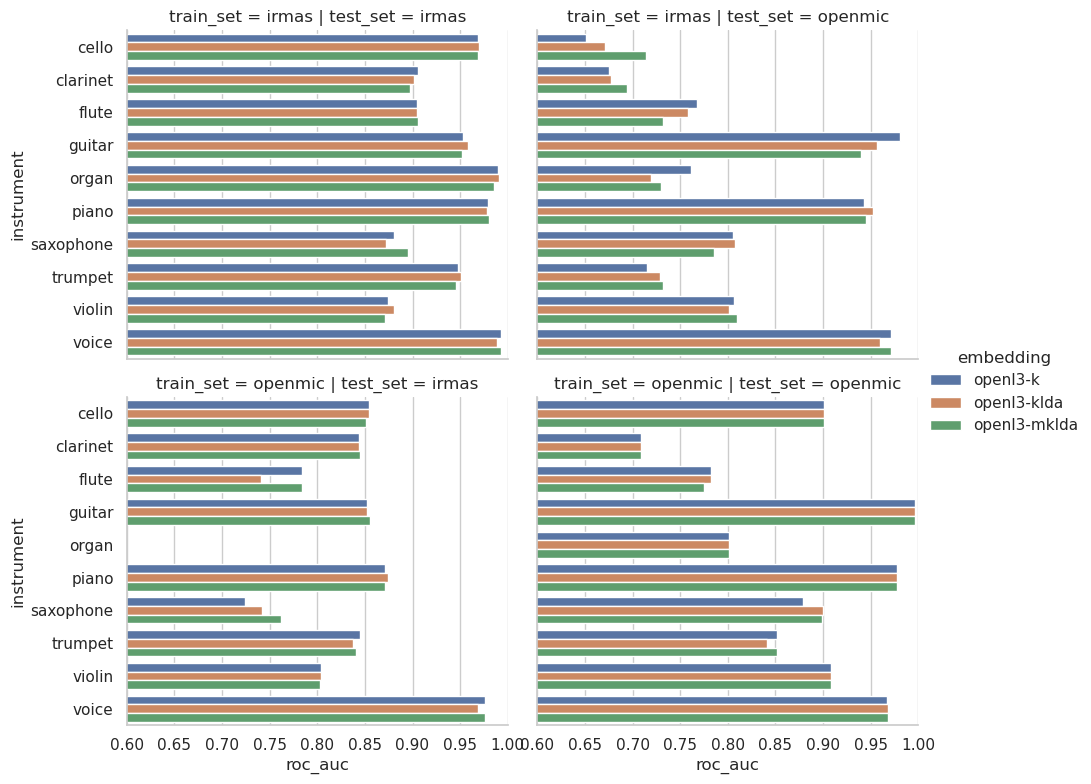

In [4]:
embedding = 'openl3'
debias_method = '-mklda'

df = pd.read_csv('results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

## YAMNet

In [3]:
embedding = 'yamnet'
debias_method = '-k'

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='./embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid, class_align=class_align)

irmas_feature = deb.load_irmas()
openmic_feature = deb.load_openmic()

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Load IRMAS data:


100%|██████████| 6705/6705 [00:03<00:00, 1776.50it/s]


# Train: 4997,  # Test: 1666
Load OpenMIC data:


100%|██████████| 5085/5085 [00:00<00:00, 29961.84it/s]


# Train: 6838,  # Test: 2491
Train on irmas, test on irmas


100%|██████████| 10/10 [02:26<00:00, 14.60s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [02:21<00:00, 14.15s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [02:23<00:00, 14.35s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [02:30<00:00, 15.09s/it]


In [4]:
debias_method = '-klda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Train on irmas, test on irmas


100%|██████████| 10/10 [18:41<00:00, 112.17s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [16:33<00:00, 99.39s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [16:05<00:00, 96.51s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [23:13<00:00, 139.31s/it]


In [5]:
debias_method = '-mklda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

deb.result_all.to_csv('results/result_' + embedding + debias_method + '.csv', index=False)
# result_all = result_all.append(deb.result_all)

Train on irmas, test on irmas


100%|██████████| 10/10 [1:15:30<00:00, 453.08s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [54:40<00:00, 328.08s/it] 


Train on openmic, test on openmic


100%|██████████| 10/10 [57:00<00:00, 342.07s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [1:17:35<00:00, 465.52s/it]


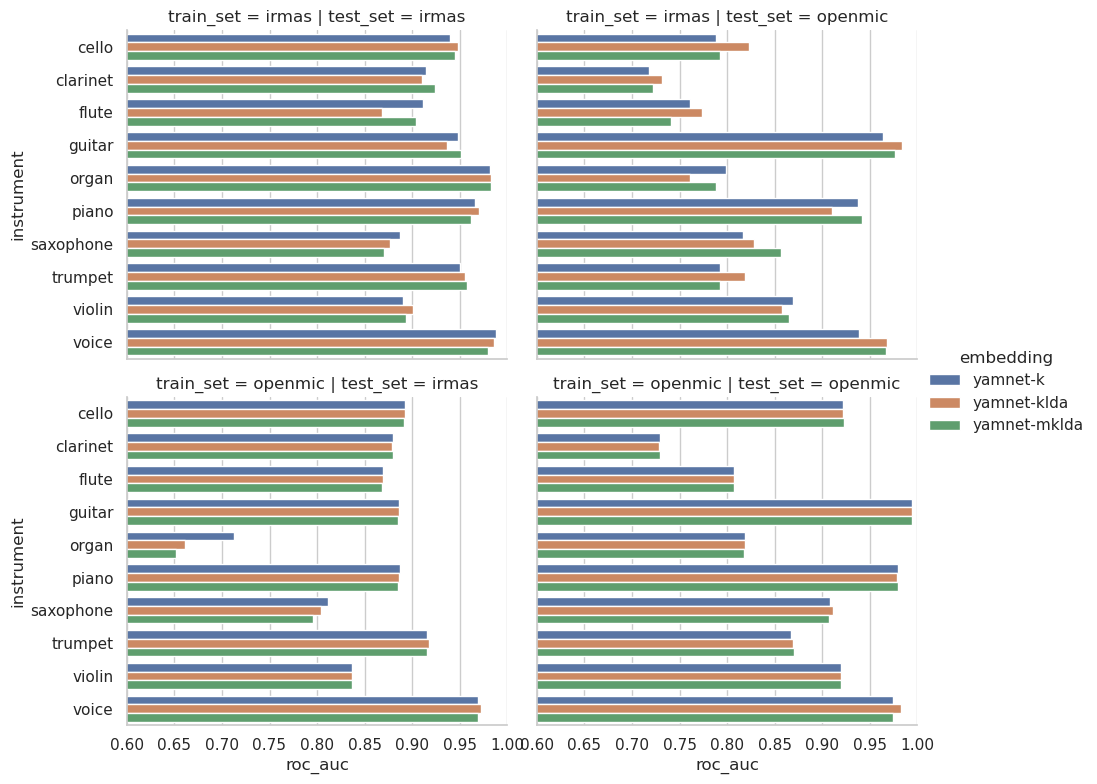

In [6]:
embedding = 'yamnet'
debias_method = '-mklda'

df = pd.read_csv('results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

In [ ]:
# result_all.to_csv('results/result_nonlinear_all.csv', index=False)

In [ ]:
# result_all

,instrument,train_set,test_set,precision,recall,f1-score,support,accuracy,roc_auc,ap,embedding
0,cello,irmas,irmas,0.16417910447761194,0.9361702127659575,0.27936507936507937,94.0,0.7274909963985594,0.9276230306967679,0.5671656332279936,vggish-k
1,clarinet,irmas,irmas,0.24407582938388625,0.8110236220472441,0.37522768670309653,127.0,0.7941176470588235,0.8950335886376776,0.5736090213032011,vggish-k
2,flute,irmas,irmas,0.3286219081272085,0.768595041322314,0.4603960396039604,121.0,0.8691476590636255,0.8934338976704378,0.6012357681536926,vggish-k
3,guitar,irmas,irmas,0.5337954939341422,0.8901734104046243,0.66738894907909,346.0,0.8157262905162065,0.9225170782974251,0.7914319993453611,vggish-k
4,organ,irmas,irmas,0.47878787878787876,0.9080459770114943,0.626984126984127,174.0,0.8871548619447779,0.9639148254291084,0.7369438506943915,vggish-k
...,...,...,...,...,...,...,...,...,...,...,...
115,piano,openmic,irmas,0.1891566265060241,0.9235294117647059,0.314,170.0,0.5882352941176471,0.8950495438817238,0.6931360013360356,yamnet-mklda
116,saxophone,openmic,irmas,0.21064814814814814,0.6066666666666667,0.3127147766323024,150.0,0.7599039615846338,0.7691116974494284,0.36394976972077464,yamnet-mklda
117,trumpet,openmic,irmas,0.31742243436754175,0.8866666666666667,0.4674868189806678,150.0,0.8181272509003601,0.9138390501319261,0.5587650101943005,yamnet-mklda
118,violin,openmic,irmas,0.21579961464354527,0.7832167832167832,0.338368580060423,143.0,0.737094837935174,0.821529094674203,0.38772189832266546,yamnet-mklda


In [12]:
# df1 = pd.read_csv('results/result_vggish-mklda.csv')
# df2 = pd.read_csv('results/result_openl3-mklda.csv')
# df3 = pd.read_csv('results/result_yamnet-mklda.csv')
# df = df1.append(df2).append(df3).reset_index(drop=True)
# df.to_csv('results/result_nonlinear_all.csv', index=False)